In [58]:
import numpy as np
import scipy as sp
from scipy import linalg as sp_linalg
import matplotlib.pyplot as plt
%matplotlib inline

V = 100
rng = np.random.RandomState(0)

power_law_seed = rng.power(a=1.0, size=V)
P_ij = np.triu(rng.lognormal(mean=1, sigma=1, size=[V, V]), k=1)
P_ij *= power_law_seed
P_ij += P_ij.T #P_ij == P_ji
P_ij /= P_ij.sum()

p_i = P_ij.sum(axis=1)
P_i = np.diag(p_i)
P_i_inv = np.diag(1.0 / p_i)
similarities = P_i_inv.dot(P_ij).dot(P_i_inv)

pmis = np.log(similarities)
pmis[pmis == -np.inf] = 0

assert np.allclose(similarities, similarities.T)
assert np.allclose(similarities.dot(P_i).sum(axis=1), 1)
assert np.allclose(P_ij, P_ij.T)
assert np.allclose(pmis, pmis.T)
assert np.allclose(P_i.sum(), 1)
assert np.allclose(P_ij.sum(), 1)

/Users/i.lobov/research/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


In [40]:
N = P_ij.shape[0]**2 * 1
rng = np.random.RandomState(0)
emp_ij = rng.multinomial(N, P_ij.flatten()).reshape([V, V])
emp_ij = emp_ij / emp_ij.sum()
emp_i = emp_ij.sum(axis=1)
emp_i_inv = np.diag(1.0 / emp_i)
emp_sim = emp_i_inv.dot(emp_ij).dot(emp_i_inv)
emp_pmi = np.log(emp_sim)
emp_pmi[emp_pmi == -np.inf] = 0
emp_ppmi = emp_pmi.copy()
emp_ppmi[emp_ppmi < 0] = 0

/Users/i.lobov/research/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/i.lobov/research/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/i.lobov/research/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


/Users/i.lobov/research/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


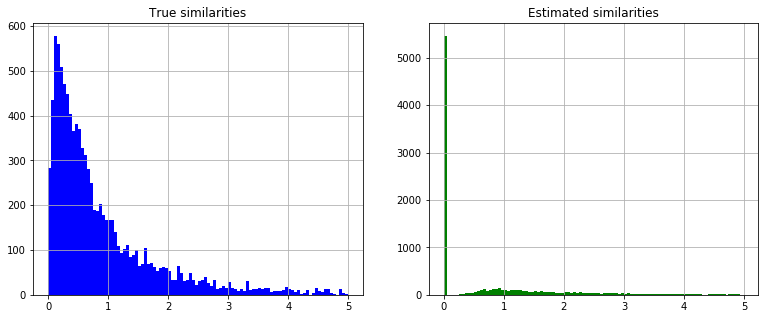

In [64]:
bins = 100

plt.figure(1, figsize=(13, 5))
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(
    similarities[similarities < 5].flatten(), 
    bins,
    facecolor='b')
plt.title('True similarities')
plt.grid(True)

plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(
    emp_sim[emp_sim < 5].flatten(), 
    bins,
    facecolor='g')
plt.title('Estimated similarities')
plt.grid(True)

plt.show()

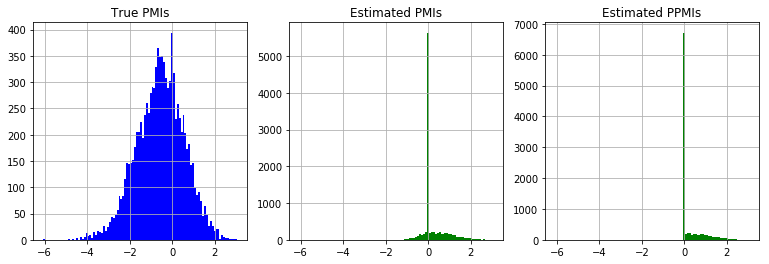

In [60]:
bins = 100

plt.figure(1, figsize=(13, 4))
plt.subplot(1, 3, 1)
n, bins, patches = plt.hist(
    pmis.flatten(), 
    bins,
    facecolor='b')
plt.title('True PMIs')
plt.grid(True)

plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(
    emp_pmi.flatten(), 
    bins,
    facecolor='g')
plt.title('Estimated PMIs')
plt.grid(True)

plt.subplot(1, 3, 3)
n, bins, patches = plt.hist(
    emp_ppmi.flatten(), 
    bins,
    facecolor='g')
plt.title('Estimated PPMIs')
plt.grid(True)

plt.show()

(array([ 3,  9, 13, 21, 33, 12,  5,  1,  2,  1]),
 array([0.00012232, 0.00262521, 0.00512809, 0.00763098, 0.01013387,
        0.01263675, 0.01513964, 0.01764253, 0.02014541, 0.0226483 ,
        0.02515119]))

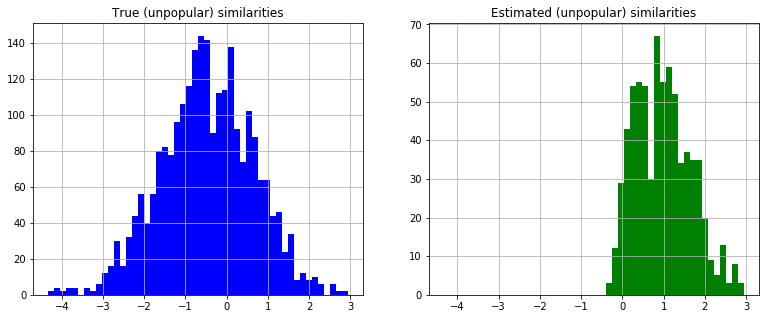

In [55]:
threshold = np.median(p_i)
unpopular_indices = np.argwhere(p_i <= threshold).flatten()
bins = 50
unpopular_pmi = pmis[unpopular_indices][:, unpopular_indices]
unpopular_emp_pmi = emp_pmi[unpopular_indices][:, unpopular_indices]

plt.figure(1, figsize=(13, 5))
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(
    unpopular_pmi[unpopular_pmi != 0].flatten(), 
    bins,
    facecolor='b')
plt.title('True (unpopular) similarities')
plt.grid(True)

plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(
    unpopular_emp_pmi[unpopular_emp_pmi != 0].flatten(), 
    bins,
    facecolor='g')
plt.title('Estimated (unpopular) similarities')
plt.grid(True)

plt.show()

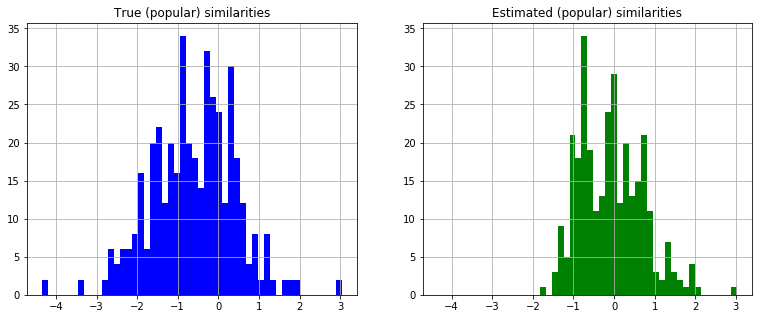

In [57]:
unpopular_indices = np.argwhere(p_i > threshold).flatten()
bins = 50
unpopular_pmi = pmis[unpopular_indices][:, unpopular_indices]
unpopular_emp_pmi = emp_pmi[unpopular_indices][:, unpopular_indices]

plt.figure(1, figsize=(13, 5))
plt.subplot(1, 2, 1)
n, bins, patches = plt.hist(
    unpopular_pmi[unpopular_pmi != 0].flatten(), 
    bins,
    facecolor='b')
plt.title('True (popular) similarities')
plt.grid(True)

plt.subplot(1, 2, 2)
n, bins, patches = plt.hist(
    unpopular_emp_pmi[unpopular_emp_pmi != 0].flatten(), 
    bins,
    facecolor='g')
plt.title('Estimated (popular) similarities')
plt.grid(True)

plt.show()